# Income prediction
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Feature Engineering

# 1) Problem statement.

1) Problem statement.
This dataset comprises the population data from various countries. It has several features such as age, type of employment, hours worked in a week, educational qualification, marital status etc. It also has the feature name income.  The purpose of this data analysis is to analyse the relationship between all the features with regard to income of a person. How these individual features or combination of the features affect the income of a person. The model built will predict the income of a person

2) Data Collection.
The Dataset is collected from https://archive.ics.uci.edu webiste
The data consists of 15 columns and 15000 rows.

2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

 Import the CSV Data as Pandas DataFrame

## 2) Data Collection.

In [4]:
import pandas as pd
data=pd.read_csv(r"Adult.csv")

In [5]:
# Take the sample of 10000 rows from the data

In [6]:
data = data.sample(10000)

In [7]:
# Show Top 5 Records

In [8]:
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
21081,38,Private,334999,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
18711,68,Local-gov,31725,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<=50K
23025,21,Private,411068,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,35,United-States,<=50K
21776,55,Private,290124,5th-6th,3,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
2041,61,Private,238611,7th-8th,4,Widowed,Other-service,Unmarried,Black,Female,0,0,38,United-States,<=50K


In [9]:
# Shape of the dataset

In [10]:
data.shape

(10000, 15)

In [11]:
# Summary of the dataset

In [12]:
# Display summary statistics for a dataframe
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000
mean,38.768200,1.911555e+05,10.094600,1094.080500,83.518000,40.59820
std,13.687958,1.066734e+05,2.577735,7462.723586,393.735402,12.02727
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.00000
25%,28.000000,1.183715e+05,9.000000,0.000000,0.000000,40.00000
50%,37.000000,1.783205e+05,10.000000,0.000000,0.000000,40.00000
75%,48.000000,2.386952e+05,13.000000,0.000000,0.000000,45.00000
max,90.000000,1.366120e+06,16.000000,99999.000000,3900.000000,99.00000


In [13]:
# Check Datatypes in the dataset

In [14]:
# Check Null and Dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 21081 to 24029
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   workclass       10000 non-null  object
 2   fnlwgt          10000 non-null  int64 
 3   education       10000 non-null  object
 4   education-num   10000 non-null  int64 
 5   marital-status  10000 non-null  object
 6   occupation      10000 non-null  object
 7   relationship    10000 non-null  object
 8   race            10000 non-null  object
 9   sex             10000 non-null  object
 10  capital-gain    10000 non-null  int64 
 11  capital-loss    10000 non-null  int64 
 12  hours-per-week  10000 non-null  int64 
 13  native-country  10000 non-null  object
 14  income          10000 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.2+ MB


# 3. EXPLORING DATA

In [15]:
# define numerical & categorical columns
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

We have 9 categorical features : ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


### Feature Information
* **age:** Age of the population
* **workclass:** working class of a person(whether private, govt etc)
* **fnlwgt:** 
* **education:** education qualification of the person
* **education-num:** education num of a person
* **marital-status:** marital status of the person
* **occupation:** The occupation of the person
* **race:** race of the person
* **sex:** sex of the person
* **capital-gain:** capital gain incurred by a person
* **capital-loss:** capital loss incurred by a person
* **hours-per-week:** hours worked by a person in a week
* **native-country:** The native country pf the person
* **income:** income of a person either less than or equal to 50k$  or more than 50k$

In [16]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(data[col].value_counts(normalize=True) * 100)
    print('---------------------------')

Private             69.50
Self-emp-not-inc     7.58
Local-gov            6.55
?                    5.15
State-gov            4.11
Self-emp-inc         3.86
Federal-gov          3.19
Never-worked         0.03
Without-pay          0.03
Name: workclass, dtype: float64
---------------------------
HS-grad         32.57
Some-college    21.77
Bachelors       16.64
Masters          5.67
Assoc-voc        4.12
11th             3.66
Assoc-acdm       3.32
10th             2.83
7th-8th          1.99
Prof-school      1.81
9th              1.54
12th             1.24
Doctorate        1.13
5th-6th          1.07
1st-4th          0.51
Preschool        0.13
Name: education, dtype: float64
---------------------------
Married-civ-spouse       46.96
Never-married            31.98
Divorced                 13.43
Separated                 3.23
Widowed                   3.11
Married-spouse-absent     1.24
Married-AF-spouse         0.05
Name: marital-status, dtype: float64
---------------------------
Exec-manager

## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

### Numerical Features

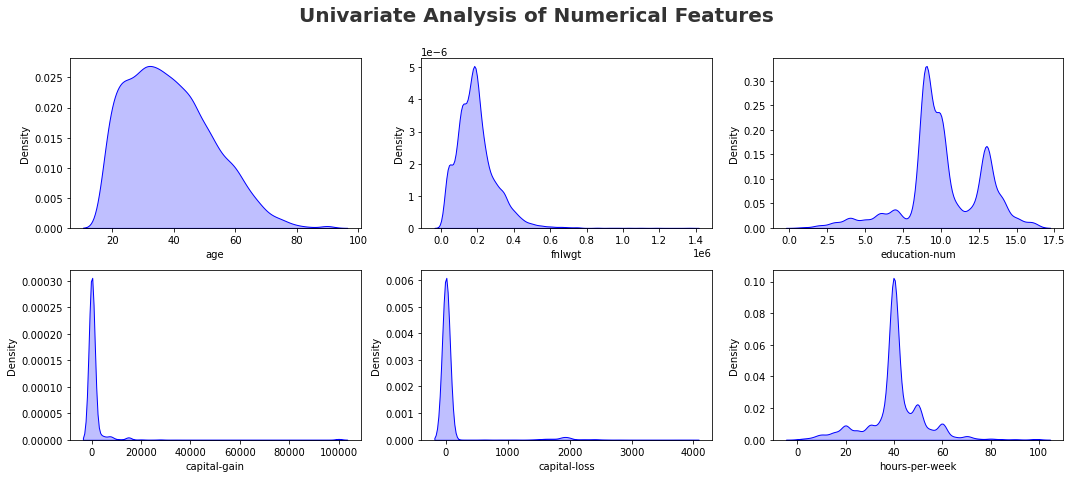

In [17]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=data[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [18]:
**Report**
* Density, fnlwgt, capital-gain, capital-loss are left skewed
* education-num is right skewed
* hours-per-week is center skewed

SyntaxError: invalid syntax (2137819156.py, line 1)

### Categorical Features

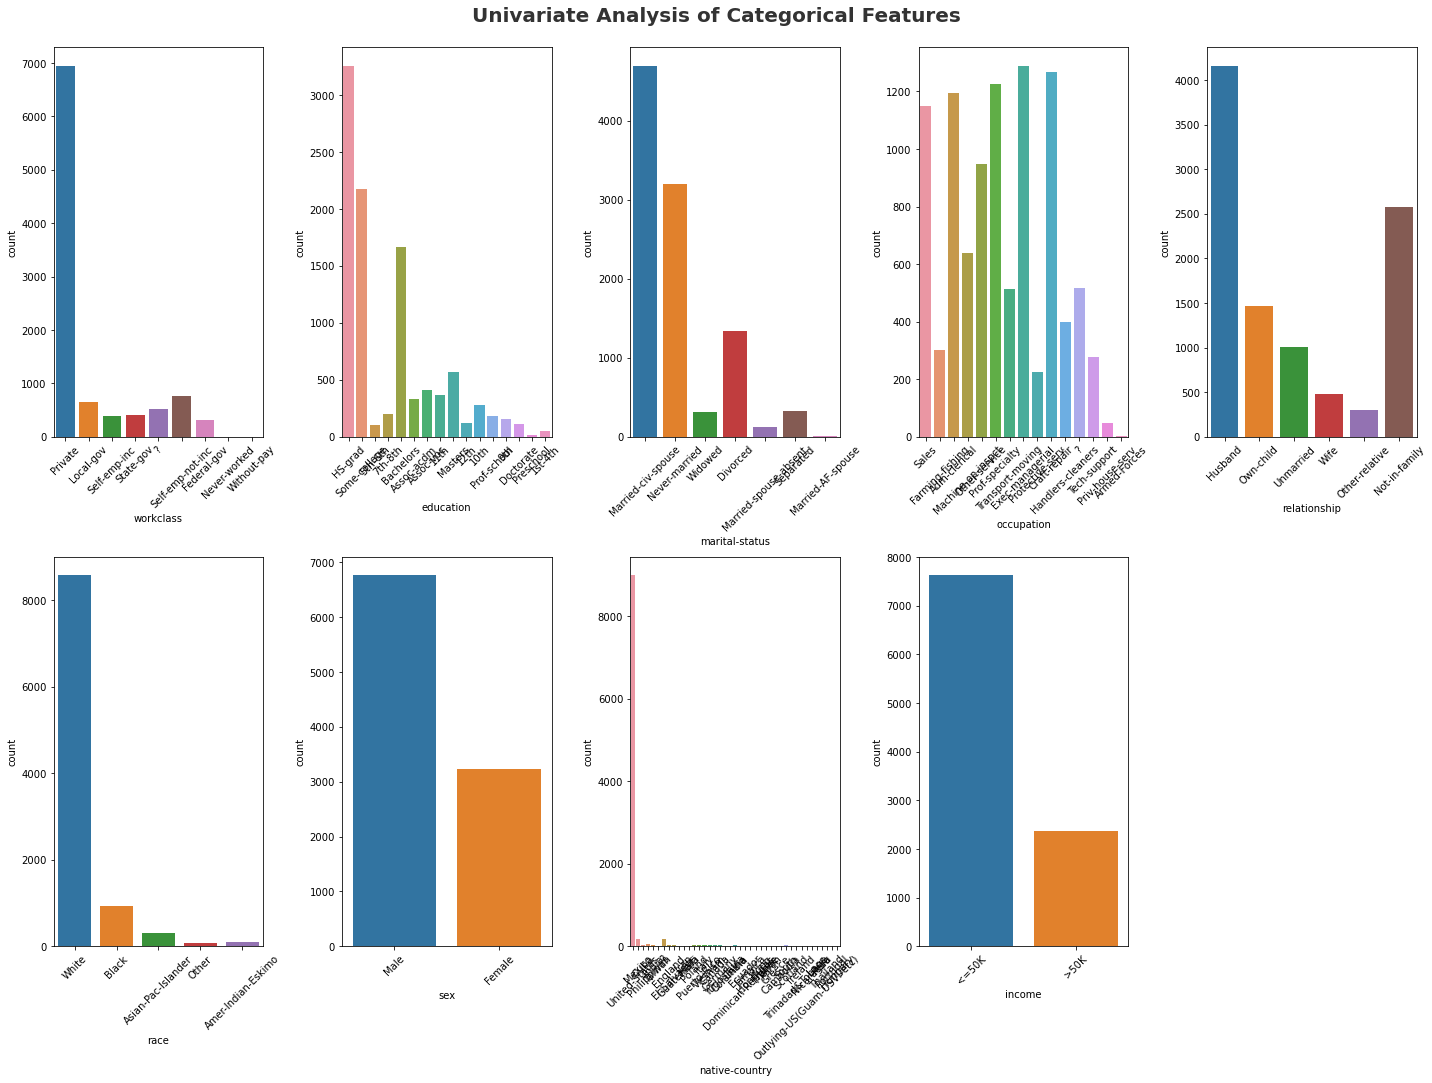

In [19]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
for i in range(0, len(cat1)):
    plt.subplot(2, 5, i+1)
    sns.countplot(x=data[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable.

### Check Multicollinearity in Numerical features

In [20]:
data[(list(data.columns)[1:])].corr()

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
fnlwgt,1.000000,-0.042673,-0.007820,-0.014954,-0.025497
education-num,-0.042673,1.000000,0.117442,0.078997,0.150110
capital-gain,-0.007820,0.117442,1.000000,-0.031101,0.072237
capital-loss,-0.014954,0.078997,-0.031101,1.000000,0.064694
hours-per-week,-0.025497,0.150110,0.072237,0.064694,1.000000


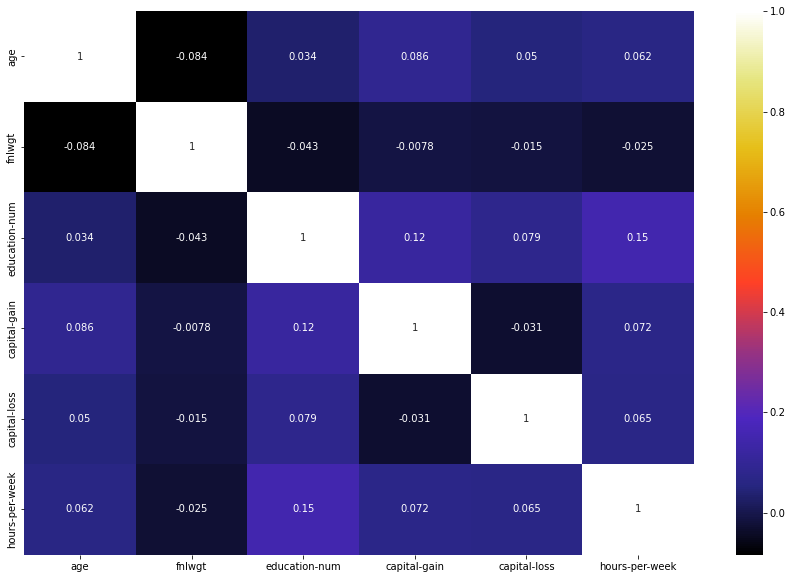

In [21]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), cmap="CMRmap", annot=True)
plt.show()

**Report** 
* Our target column income has a weak negative correlationwit hours-per-week
* age, eduacation-num has positive correlation with target column income

In [22]:
### Check Multicollinearity for Categorical features

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e income**

In [23]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(data['income'], data[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,workclass,Reject Null Hypothesis
1,education,Reject Null Hypothesis
2,marital-status,Reject Null Hypothesis
3,occupation,Reject Null Hypothesis
4,relationship,Reject Null Hypothesis
5,race,Reject Null Hypothesis
6,sex,Reject Null Hypothesis
7,native-country,Reject Null Hypothesis
8,income,Reject Null Hypothesis


### Checking Null Values

In [24]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [25]:
continues_features=[feature for feature in numeric_features if len(data[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


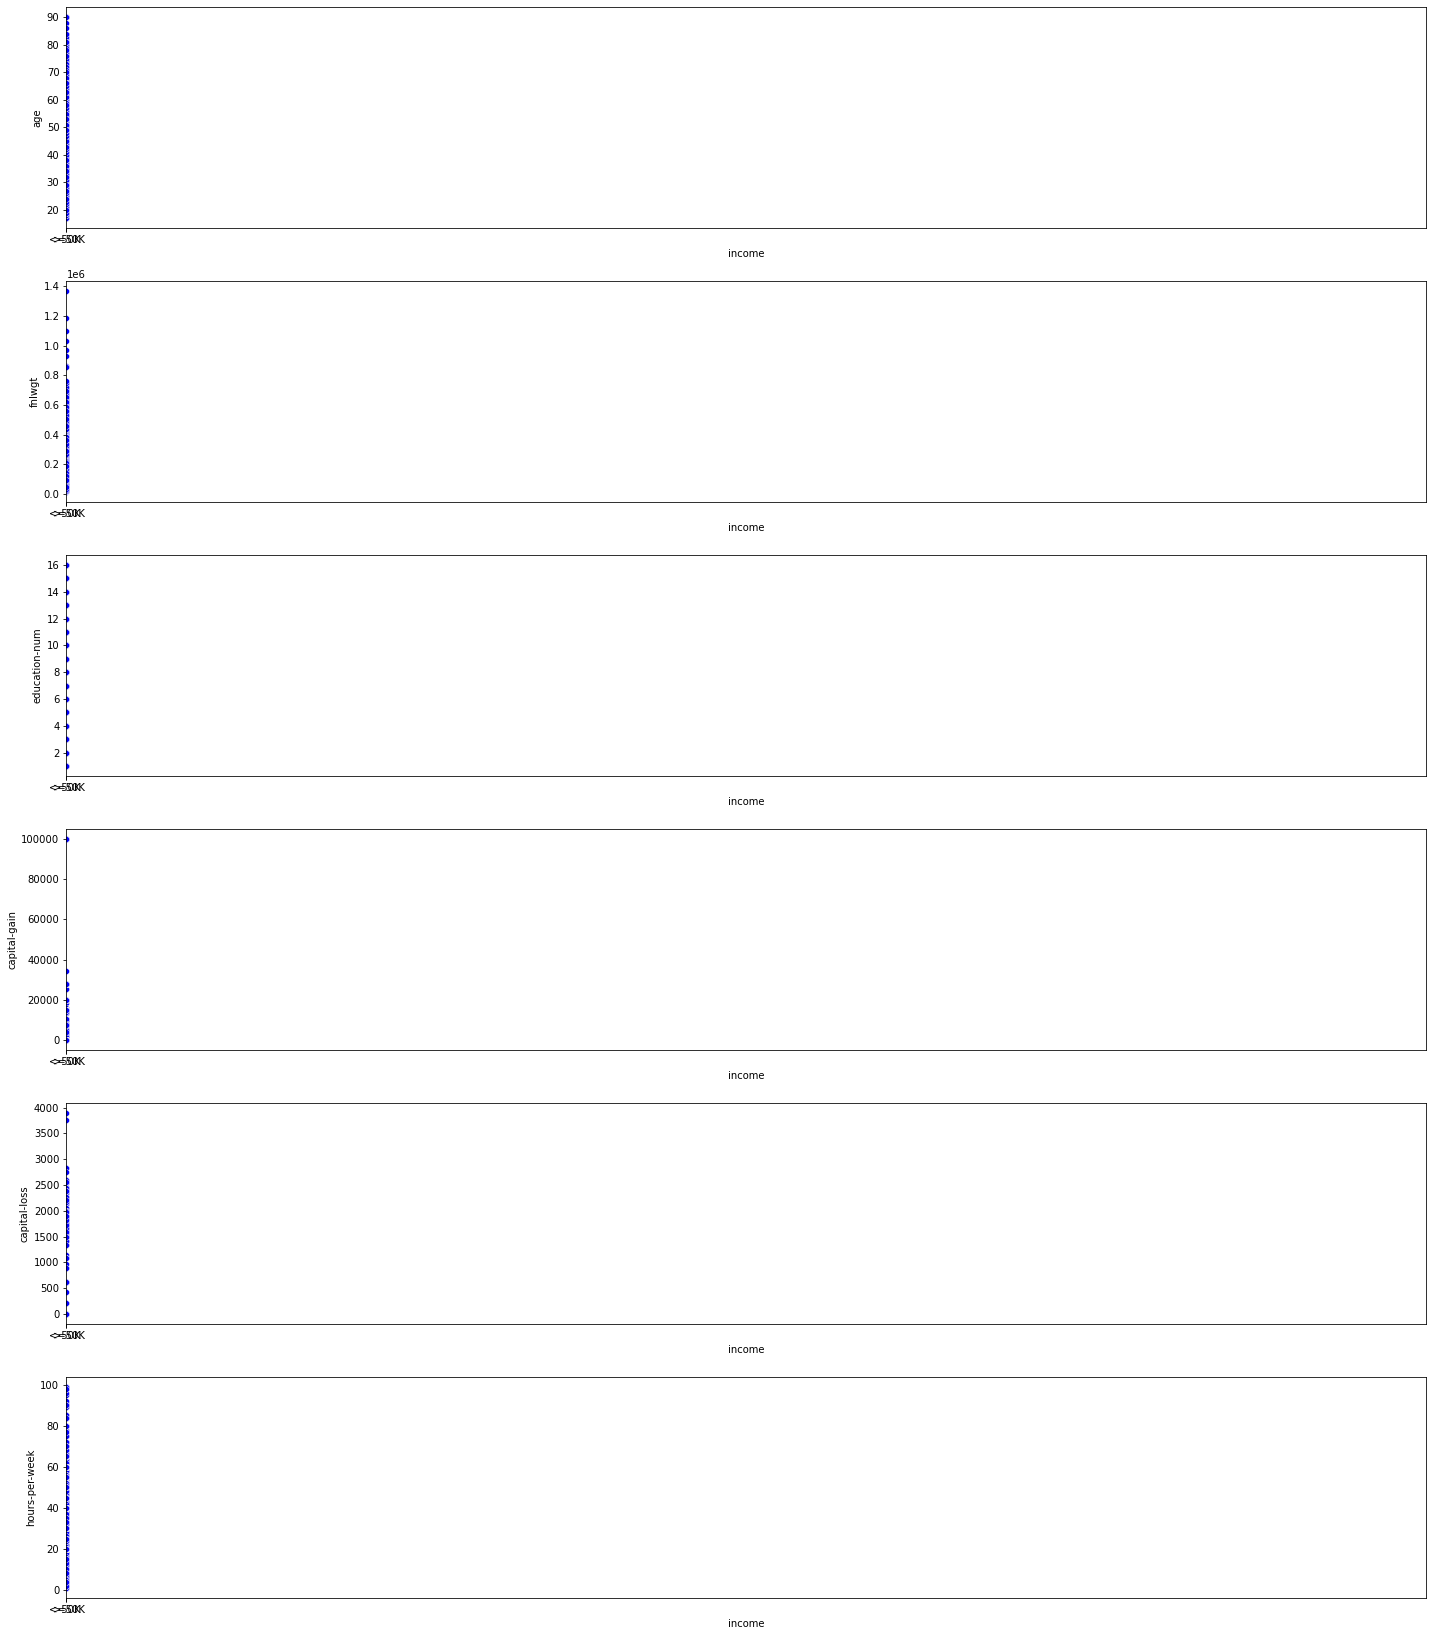

In [26]:
fig = plt.figure(figsize=(20, 30))

for i in range(0, len(continues_features)):
    ax = plt.subplot(8, 1, i+1)

    sns.scatterplot(data= data ,x='income', y=continues_features[i], color='b')
    plt.xlim(0,100000) # Limit to 100000
    plt.tight_layout()

## 4. Visualization

### 4.1 Visualize the Target Feature

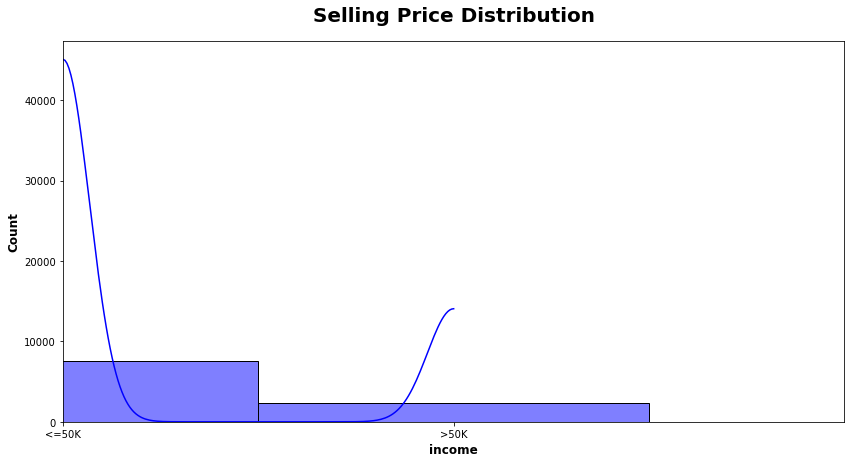

In [27]:
plt.subplots(figsize=(14,7))
sns.histplot(data.income, bins=200, kde=True, color = 'b')
plt.title("Selling Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("income", weight="bold", fontsize=12)
plt.xlim(0,2)
plt.show()

### 4.2 Most no working class in population?

In [28]:
data.workclass.value_counts()[0:10]

Private             6950
Self-emp-not-inc     758
Local-gov            655
?                    515
State-gov            411
Self-emp-inc         386
Federal-gov          319
Never-worked           3
Without-pay            3
Name: workclass, dtype: int64

private sector accounts for more no of working class population followed by self employed

### 4.2 Most no education in population?

In [29]:
data.education.value_counts()[0:10]

HS-grad         3257
Some-college    2177
Bachelors       1664
Masters          567
Assoc-voc        412
11th             366
Assoc-acdm       332
10th             283
7th-8th          199
Prof-school      181
Name: education, dtype: int64

High school grads tops most in the list , followed by some college degree

### 4.2 Most no of race in population?

In [30]:
data.race.value_counts()[0:10]

White                 8577
Black                  934
Asian-Pac-Islander     315
Amer-Indian-Eskimo     102
Other                   72
Name: race, dtype: int64

White race tops the list , followed by black

In [31]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

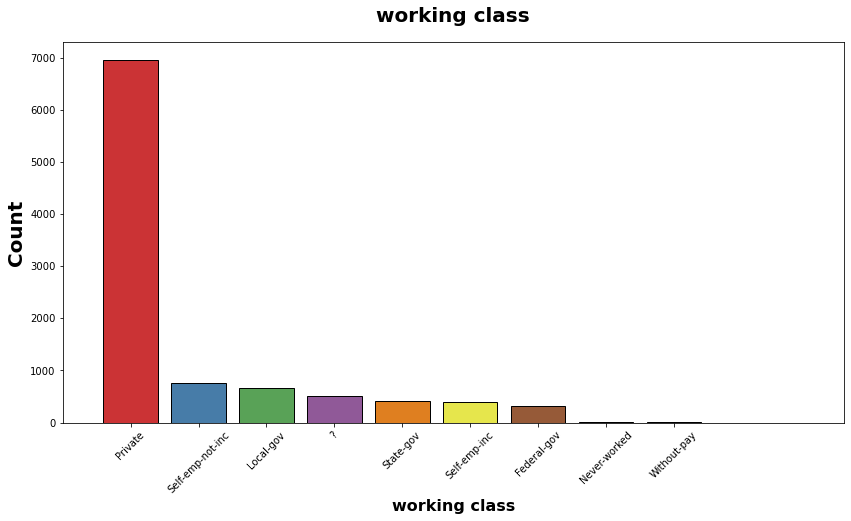

In [32]:
plt.subplots(figsize=(14,7))
sns.countplot(x="workclass", data=data,ec = "black",palette="Set1",order = data['workclass'].value_counts().index)
plt.title("working class", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("working class", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

In [34]:
data.rename(columns = {'marital-status':'marital_status', 'native-country':'native_country'}, inplace = True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 21081 to 24029
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   workclass       10000 non-null  object
 2   fnlwgt          10000 non-null  int64 
 3   education       10000 non-null  object
 4   education-num   10000 non-null  int64 
 5   marital_status  10000 non-null  object
 6   occupation      10000 non-null  object
 7   relationship    10000 non-null  object
 8   race            10000 non-null  object
 9   sex             10000 non-null  object
 10  capital-gain    10000 non-null  int64 
 11  capital-loss    10000 non-null  int64 
 12  hours-per-week  10000 non-null  int64 
 13  native_country  10000 non-null  object
 14  income          10000 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.5+ MB


In [36]:
data.shape

(10000, 15)

In [37]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,10000.0,38.7682,13.687958,17.0,28.0,37.0,48.00,90.0
fnlwgt,10000.0,191155.4583,106673.412495,13769.0,118371.5,178320.5,238695.25,1366120.0
education-num,10000.0,10.0946,2.577735,1.0,9.0,10.0,13.00,16.0
capital-gain,10000.0,1094.0805,7462.723586,0.0,0.0,0.0,0.00,99999.0
capital-loss,10000.0,83.5180,393.735402,0.0,0.0,0.0,0.00,3900.0
hours-per-week,10000.0,40.5982,12.027270,1.0,40.0,40.0,45.00,99.0


In [38]:
data['income'].replace(['<=50K', '>50K'],
                        [0, 1], inplace=True)

In [39]:
data["income"] = data["income"].astype("float")

In [40]:
list1 = data.columns.tolist()
for i in list1:
    print(data.groupby([i]).size().sort_values(ascending=False))
    print("**********************")

age
23    288
31    287
36    282
33    274
35    267
     ... 
81      4
82      1
83      1
86      1
88      1
Length: 71, dtype: int64
**********************
workclass
Private             6950
Self-emp-not-inc     758
Local-gov            655
?                    515
State-gov            411
Self-emp-inc         386
Federal-gov          319
Never-worked           3
Without-pay            3
dtype: int64
**********************
fnlwgt
116358     6
99185      6
206609     5
113364     5
125892     5
          ..
146879     1
146834     1
146788     1
146719     1
1366120    1
Length: 8549, dtype: int64
**********************
education
HS-grad         3257
Some-college    2177
Bachelors       1664
Masters          567
Assoc-voc        412
11th             366
Assoc-acdm       332
10th             283
7th-8th          199
Prof-school      181
9th              154
12th             124
Doctorate        113
5th-6th          107
1st-4th           51
Preschool         13
dtype: int64
********

In [41]:
# Analysis

* Most of the population in the age group 30 to 40
* 2/3 of the population works in the private sector
* Most of the population is HS-grad, Some-college, Bachelors
* 80% of the population is white, 10% is black, rest are from other races
* Male population is twice the population of female
* Majority of the population data (90%) is from the US

# 5. Preprocessing

In [42]:
# Check for null values in the data

In [43]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native_country    0
income            0
dtype: int64

In [44]:
# Let us group by occupation

In [45]:
data.groupby('native_country').size().sort_values(ascending=False)

native_country
United-States                 8995
Mexico                         186
?                              183
Philippines                     62
Germany                         36
Puerto-Rico                     33
El-Salvador                     33
Canada                          30
England                         26
Italy                           26
India                           26
Cuba                            25
Vietnam                         22
South                           22
Poland                          21
China                           21
Jamaica                         20
Dominican-Republic              20
Columbia                        20
Guatemala                       19
Taiwan                          18
Haiti                           17
Iran                            15
Japan                           13
Peru                            12
Portugal                         9
Greece                           9
Thailand                         8
Hong 

* USA has the largest data, followed by mexico, ?, phillipplines
* Hungary has the least data in this dataset

In [46]:
# Now let us group by income 

In [47]:
data.groupby('income').size().sort_values(ascending=False)

income
0.0    7622
1.0    2378
dtype: int64

* Largest population earns less than or equal to 50k per annum
* close to quarter of the population earns more than 50k per annum

In [48]:
# Now let us group by sex

In [49]:
data.groupby('sex').size().sort_values(ascending=False)

sex
Male      6761
Female    3239
dtype: int64

Male population is twice the population of Female population in the dataset

# Splitting of the Data

In [50]:
y = data['income']
X = data.drop('income', axis = 1)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2) 

In [52]:
category_var = [col for col in X.columns if X[col].dtypes == object]
category_var

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [53]:
numeric_var = [col for col in X.columns if X[col].dtypes != object]
numeric_var

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [54]:
# Feature Scaling

In [55]:
one_hot = ce.OneHotEncoder(cols = category_var, handle_unknown = 'ignore')

# Creating dataframe for categorical variables which converted to one hot encoded variables.
X_train_one_hot = pd.DataFrame(one_hot.fit_transform(X_train))
X_test_one_hot = pd.DataFrame(one_hot.transform(X_test))


X_train_one_hot.index = X_train.index
X_test_one_hot.index = X_test.index

num_X_train = X_train[numeric_var]
num_X_test = X_test[numeric_var]

# Joining numerical and one hot encoded variables to create our final X_train and X_test.
X_train_new = pd.concat([num_X_train, X_train_one_hot], axis = 1)
X_test_new = pd.concat([num_X_test, X_test_one_hot], axis = 1)

In [56]:
# Scaling our records into standard range of 0 and 1.
scaler = StandardScaler()

X_train_new = scaler.fit_transform(X_train_new)
X_test_new = scaler.transform(X_test_new)

# 6. Model building

# Logistic Regression

In [57]:
model_logr = LogisticRegression(random_state = 1,solver="liblinear")
model_logr.fit(X_train_new, y_train)
pred_logr = model_logr.predict(X_test_new)
print('Logistic Regression accuracy score:{0:0.2f}%'. format(accuracy_score(y_test, pred_logr)*100))

Logistic Regression accuracy score:85.65%


# SVC

In [58]:
classifier = SVC(random_state = 0,kernel = 'rbf')
classifier.fit(X_train_new, y_train)

SVC(random_state=0)

In [59]:
#Predicting the Test Set

In [60]:
y_pred = classifier.predict(X_test_new)

In [61]:
y_pred = classifier.predict(X_test_new)

In [62]:
y_pred.shape

(2000,)

In [59]:
# Now let us apply the kernel functions 

In [60]:
classifier = SVC(kernel="linear")
classifier.fit(X_train_new, y_train)
y_pred = classifier.predict(X_test_new)
accuracy_score(y_test, y_pred)

0.852

In [61]:
classifier = SVC(kernel="poly")
classifier.fit(X_train_new, y_train)
y_pred = classifier.predict(X_test_new)
accuracy_score(y_test, y_pred)

0.8175

In [62]:
classifier = SVC(kernel="rbf")
classifier.fit(X_train_new, y_train)
y_pred = classifier.predict(X_test_new)
accuracy_score(y_test, y_pred)

0.8375

In [63]:
classifier = SVC(kernel="sigmoid")
classifier.fit(X_train_new, y_train)
y_pred = classifier.predict(X_test_new)
accuracy_score(y_test, y_pred)

0.8295

SVC with kernel = rbf / linear gives the highest accuracy

In [64]:
model = SVC(kernel="sigmoid")
model.fit(X_train_new, y_train)

SVC(kernel='sigmoid')

# Hyperparameter tuning using GridSearchCV

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
param_grid = {'C': [0.1, 1, 10], 
              'kernel': ['linear','rbf','sigmoid']} 

In [67]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [68]:
# fitting the model for grid search

In [69]:
grid.fit(X_train_new, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.842 total time=   4.3s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.833 total time=   4.9s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.851 total time=   4.9s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.855 total time=   4.2s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.855 total time=   3.9s
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.820 total time=   6.0s
[CV 2/5] END .................C=0.1, kernel=rbf;, score=0.819 total time=   5.8s
[CV 3/5] END .................C=0.1, kernel=rbf;, score=0.838 total time=   5.6s
[CV 4/5] END .................C=0.1, kernel=rbf;, score=0.838 total time=   6.1s
[CV 5/5] END .................C=0.1, kernel=rbf;, score=0.840 total time=   6.2s
[CV 1/5] END .............C=0.1, kernel=sigmoid;, score=0.832 total time=   5.1s
[CV 2/5] END .............C=0.1, kernel=sigmoid;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             verbose=3)

In [70]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 10, 'kernel': 'linear'}


In [71]:
model = SVC(C=10,kernel="linear")

In [72]:
model.fit(X_train_new, y_train)

SVC(C=10, kernel='linear')

In [73]:
y_pred = model.predict(X_test_new)

In [74]:
accuracy_score(y_test, y_pred)

0.8525

# Evaluation of the model

In [75]:
from sklearn import metrics

In [76]:
from sklearn.metrics import roc_auc_score

In [77]:
from sklearn.metrics import r2_score

In [78]:
# Classification confusion matrix, ROC AUC score

In [79]:
confusion_matrix(y_test, y_pred)

array([[1437,   80],
       [ 215,  268]], dtype=int64)

In [80]:
# r2 score 

In [81]:
metrics.r2_score(y_test, y_pred)

0.19477119901298034

In [82]:
# Adjusted R square

In [83]:
metrics.roc_auc_score(y_test, y_pred)

0.7510648809694408

# Save the model using pickle and then use pickle to predict

In [84]:
import pickle

In [85]:
file = open('power_svr.pkl', 'wb')

In [86]:
# dump file model info file
pickle.dump(model, file)

In [87]:
file.close()  # close the file

In [88]:
model = open('power_svr.pkl', 'rb')
power = pickle.load(model)

In [89]:
# Predict using the pickle

In [90]:
y_predict = power.predict(X_test_new)

In [91]:
y_predict

array([0., 0., 0., ..., 0., 0., 0.])